In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 73.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.

In [3]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.1 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [4]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [5]:
# Spanish corpus of 44 texts from ECHR (automatic translations) with projected (reviewed) annotations

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='ES-rev-train.tsv', column_delimiter=' ',
                                    dev_file='ES-rev-dev.tsv',
                                    test_file='ES-rev-test.tsv'
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2024-01-23 11:19:53,974 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2024-01-23 11:19:53,975 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-rev-train.tsv
2024-01-23 11:19:53,976 Dev: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-rev-dev.tsv
2024-01-23 11:19:53,978 Test: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-rev-test.tsv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 1245,
        "number_of_documents_per_class": {
            "CODE": 39,
            "PER": 268,
            "DATETIME": 602,
            "LOC": 82,
            "ORG": 184,
            "DEM": 67,
            "MISC": 40,
            "QUANTITY": 42
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 34924,
            "min": 1,
            "max": 556,
            "avg": 28.05140562248996
        }
    },
    "TEST": {
        "dataset": "TEST

In [6]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-multi")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

2024-01-23 11:21:05,644 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-PER, E-PER, S-LOC, B-MISC, I-MISC, E-MISC, S-PER, B-ORG, E-ORG, S-ORG, I-ORG, B-LOC, E-LOC, S-MISC, I-PER, I-LOC, <START>, <STOP>


In [7]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2024-01-23 11:21:06,307 Computing label dictionary. Progress:


1245it [00:00, 34665.51it/s]

2024-01-23 11:21:06,349 Dictionary created for label 'ner' with 9 values: DATETIME (seen 602 times), PER (seen 268 times), ORG (seen 184 times), LOC (seen 82 times), DEM (seen 67 times), QUANTITY (seen 42 times), MISC (seen 40 times), CODE (seen 39 times)
[b'<unk>', b'DATETIME', b'PER', b'ORG', b'LOC', b'DEM', b'QUANTITY', b'MISC', b'CODE']


In [8]:
print(tagger.label_dictionary.idx2item)

[b'<unk>', b'O', b'B-PER', b'E-PER', b'S-LOC', b'B-MISC', b'I-MISC', b'E-MISC', b'S-PER', b'B-ORG', b'E-ORG', b'S-ORG', b'I-ORG', b'B-LOC', b'E-LOC', b'S-MISC', b'I-PER', b'I-LOC', b'<START>', b'<STOP>']


In [9]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2024-01-23 11:21:06,365 SequenceTagger predicts: Dictionary with 33 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-DEM, B-DEM, E-DEM, I-DEM, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-MISC, B-MISC, E-MISC, I-MISC, S-CODE, B-CODE, E-CODE, I-CODE


In [10]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [11]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=13,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2024-01-23 11:21:07,072 ----------------------------------------------------------------------------------------------------
2024-01-23 11:21:07,075 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '/home/alan/.flair/embeddings/glove.gensim'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): WordEmbeddings(
      '/home/alan/.flair/embeddings/de-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_3): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_

100%|██████████| 6/6 [00:02<00:00,  2.74it/s]

2024-01-23 11:21:38,124 Evaluating as a multi-label problem: False
2024-01-23 11:21:38,143 DEV : loss 0.4482612609863281 - f1-score (micro avg)  0.5502
2024-01-23 11:21:38,164 BAD EPOCHS (no improvement): 0
2024-01-23 11:21:38,169 saving best model


2024-01-23 11:21:44,107 ----------------------------------------------------------------------------------------------------
2024-01-23 11:21:44,667 epoch 2 - iter 3/39 - loss 0.45310415 - time (sec): 0.56 - samples/sec: 4025.45 - lr: 0.100000
2024-01-23 11:21:47,114 epoch 2 - iter 6/39 - loss 0.47314218 - time (sec): 3.01 - samples/sec: 1726.09 - lr: 0.100000
2024-01-23 11:21:48,620 epoch 2 - iter 9/39 - loss 0.47389187 - time (sec): 4.51 - samples/sec: 1726.46 - lr: 0.100000
2024-01-23 11:21:50,133 epoch 2 - iter 12/39 - loss 0.47892564 - time (sec): 6.02 - samples/sec: 1733.61 - lr: 0.100000
2024-01-23 11:21:52,927 epoch 2 - iter 15/39 - loss 0.56620065 - time (sec): 8.82 - samples/sec: 1545.21 - lr: 0.100000
2024-01-23 11:21:54,525 epoch 2 - iter 18/39 - loss 0.55731832 - time (sec): 10.42 - samples/sec: 1549.05 - lr: 0.100000
2024-01-23 11:21:56,081 epoch 2 - iter 21/39 - loss 0.53452736 - time (sec): 11.97 - samples/sec: 1567.79 - lr: 0.100000
2024-01-23 11:21:57,710 epoch 2 - it

100%|██████████| 6/6 [00:01<00:00,  3.28it/s]

2024-01-23 11:22:08,867 Evaluating as a multi-label problem: False
2024-01-23 11:22:08,882 DEV : loss 0.30709049105644226 - f1-score (micro avg)  0.6319
2024-01-23 11:22:08,907 BAD EPOCHS (no improvement): 0
2024-01-23 11:22:08,912 saving best model


2024-01-23 11:22:15,360 ----------------------------------------------------------------------------------------------------
2024-01-23 11:22:15,933 epoch 3 - iter 3/39 - loss 0.34553526 - time (sec): 0.57 - samples/sec: 4805.94 - lr: 0.100000
2024-01-23 11:22:19,415 epoch 3 - iter 6/39 - loss 0.30557343 - time (sec): 4.05 - samples/sec: 1332.07 - lr: 0.100000
2024-01-23 11:22:21,036 epoch 3 - iter 9/39 - loss 0.31787485 - time (sec): 5.67 - samples/sec: 1466.27 - lr: 0.100000
2024-01-23 11:22:22,656 epoch 3 - iter 12/39 - loss 0.32362231 - time (sec): 7.29 - samples/sec: 1529.49 - lr: 0.100000
2024-01-23 11:22:24,254 epoch 3 - iter 15/39 - loss 0.31130756 - time (sec): 8.89 - samples/sec: 1534.13 - lr: 0.100000
2024-01-23 11:22:26,068 epoch 3 - iter 18/39 - loss 0.32424950 - time (sec): 10.71 - samples/sec: 1521.81 - lr: 0.100000
2024-01-23 11:22:27,876 epoch 3 - iter 21/39 - loss 0.32099001 - time (sec): 12.51 - samples/sec: 1539.80 - lr: 0.100000
2024-01-23 11:22:29,496 epoch 3 - it

100%|██████████| 6/6 [00:01<00:00,  4.05it/s]

2024-01-23 11:22:40,763 Evaluating as a multi-label problem: False
2024-01-23 11:22:40,778 DEV : loss 0.258748322725296 - f1-score (micro avg)  0.6013
2024-01-23 11:22:40,800 BAD EPOCHS (no improvement): 1
2024-01-23 11:22:40,805 ----------------------------------------------------------------------------------------------------


2024-01-23 11:22:41,411 epoch 4 - iter 3/39 - loss 0.26086005 - time (sec): 0.60 - samples/sec: 4511.21 - lr: 0.100000
2024-01-23 11:22:43,127 epoch 4 - iter 6/39 - loss 0.28913682 - time (sec): 2.32 - samples/sec: 2459.70 - lr: 0.100000
2024-01-23 11:22:44,836 epoch 4 - iter 9/39 - loss 0.29884195 - time (sec): 4.03 - samples/sec: 2085.44 - lr: 0.100000
2024-01-23 11:22:46,492 epoch 4 - iter 12/39 - loss 0.28554150 - time (sec): 5.69 - samples/sec: 1984.52 - lr: 0.100000
2024-01-23 11:22:48,186 epoch 4 - iter 15/39 - loss 0.27614574 - time (sec): 7.38 - samples/sec: 1891.81 - lr: 0.100000
2024-01-23 11:22:49,810 epoch 4 - iter 18/39 - loss 0.25898456 - time (sec): 9.00 - samples/sec: 1818.92 - lr: 0.100000
2024-01-23 11:22:51,585 epoch 4 - iter 21/39 - loss 0.25950832 - time (sec): 10.78 - samples/sec: 1777.08 - lr: 0.100000
2024-01-23 11:22:53,137 epoch 4 - iter 24/39 - loss 0.26211368 - time (sec): 12.33 - samples/sec: 1734.07 - lr: 0.100000
2024-01-23 11:22:54,775 epoch 4 - iter 27

100%|██████████| 6/6 [00:01<00:00,  4.20it/s]

2024-01-23 11:23:04,560 Evaluating as a multi-label problem: False
2024-01-23 11:23:04,576 DEV : loss 0.2030620127916336 - f1-score (micro avg)  0.6926
2024-01-23 11:23:04,600 BAD EPOCHS (no improvement): 0
2024-01-23 11:23:04,606 saving best model


2024-01-23 11:23:10,341 ----------------------------------------------------------------------------------------------------
2024-01-23 11:23:10,873 epoch 5 - iter 3/39 - loss 0.18545715 - time (sec): 0.53 - samples/sec: 4433.60 - lr: 0.100000
2024-01-23 11:23:14,626 epoch 5 - iter 6/39 - loss 0.21739772 - time (sec): 4.28 - samples/sec: 1151.63 - lr: 0.100000
2024-01-23 11:23:16,893 epoch 5 - iter 9/39 - loss 0.38576285 - time (sec): 6.55 - samples/sec: 1226.90 - lr: 0.100000
2024-01-23 11:23:18,673 epoch 5 - iter 12/39 - loss 0.36160591 - time (sec): 8.33 - samples/sec: 1267.35 - lr: 0.100000
2024-01-23 11:23:20,518 epoch 5 - iter 15/39 - loss 0.32538839 - time (sec): 10.17 - samples/sec: 1313.85 - lr: 0.100000
2024-01-23 11:23:22,262 epoch 5 - iter 18/39 - loss 0.30543719 - time (sec): 11.92 - samples/sec: 1343.61 - lr: 0.100000
2024-01-23 11:23:24,121 epoch 5 - iter 21/39 - loss 0.28485606 - time (sec): 13.78 - samples/sec: 1343.34 - lr: 0.100000
2024-01-23 11:23:25,944 epoch 5 - i

100%|██████████| 6/6 [00:01<00:00,  3.85it/s]

2024-01-23 11:23:37,585 Evaluating as a multi-label problem: False
2024-01-23 11:23:37,605 DEV : loss 0.1860596239566803 - f1-score (micro avg)  0.6959


2024-01-23 11:23:37,631 BAD EPOCHS (no improvement): 0
2024-01-23 11:23:37,637 saving best model
2024-01-23 11:23:43,579 ----------------------------------------------------------------------------------------------------
2024-01-23 11:23:44,199 epoch 6 - iter 3/39 - loss 0.20745024 - time (sec): 0.62 - samples/sec: 4382.46 - lr: 0.100000
2024-01-23 11:23:47,816 epoch 6 - iter 6/39 - loss 0.19953884 - time (sec): 4.23 - samples/sec: 1237.36 - lr: 0.100000
2024-01-23 11:23:49,483 epoch 6 - iter 9/39 - loss 0.18648505 - time (sec): 5.90 - samples/sec: 1291.12 - lr: 0.100000
2024-01-23 11:23:51,858 epoch 6 - iter 12/39 - loss 0.32839662 - time (sec): 8.28 - samples/sec: 1286.96 - lr: 0.100000
2024-01-23 11:23:53,644 epoch 6 - iter 15/39 - loss 0.29962047 - time (sec): 10.06 - samples/sec: 1331.73 - lr: 0.100000
2024-01-23 11:23:55,459 epoch 6 - iter 18/39 - loss 0.28498930 - time (sec): 11.88 - samples/sec: 1354.62 - lr: 0.100000
2024-01-23 11:23:57,741 epoch 6 - iter 21/39 - loss 0.27517

100%|██████████| 6/6 [00:01<00:00,  3.67it/s]

2024-01-23 11:24:10,574 Evaluating as a multi-label problem: False
2024-01-23 11:24:10,590 DEV : loss 0.16402071714401245 - f1-score (micro avg)  0.7097


2024-01-23 11:24:10,617 BAD EPOCHS (no improvement): 0
2024-01-23 11:24:10,623 saving best model
2024-01-23 11:24:16,437 ----------------------------------------------------------------------------------------------------
2024-01-23 11:24:17,714 epoch 7 - iter 3/39 - loss 0.61050090 - time (sec): 1.27 - samples/sec: 2311.89 - lr: 0.100000
2024-01-23 11:24:20,705 epoch 7 - iter 6/39 - loss 0.40784258 - time (sec): 4.27 - samples/sec: 1357.68 - lr: 0.100000
2024-01-23 11:24:22,289 epoch 7 - iter 9/39 - loss 0.35427380 - time (sec): 5.85 - samples/sec: 1413.12 - lr: 0.100000
2024-01-23 11:24:23,836 epoch 7 - iter 12/39 - loss 0.30086207 - time (sec): 7.40 - samples/sec: 1443.98 - lr: 0.100000
2024-01-23 11:24:25,634 epoch 7 - iter 15/39 - loss 0.26245417 - time (sec): 9.19 - samples/sec: 1470.43 - lr: 0.100000
2024-01-23 11:24:27,472 epoch 7 - iter 18/39 - loss 0.25116124 - time (sec): 11.03 - samples/sec: 1487.49 - lr: 0.100000
2024-01-23 11:24:29,138 epoch 7 - iter 21/39 - loss 0.235824

100%|██████████| 6/6 [00:01<00:00,  3.73it/s]

2024-01-23 11:24:42,336 Evaluating as a multi-label problem: False
2024-01-23 11:24:42,352 DEV : loss 0.1689317524433136 - f1-score (micro avg)  0.7393
2024-01-23 11:24:42,376 BAD EPOCHS (no improvement): 0
2024-01-23 11:24:42,382 saving best model


2024-01-23 11:24:48,219 ----------------------------------------------------------------------------------------------------
2024-01-23 11:24:48,844 epoch 8 - iter 3/39 - loss 0.11725627 - time (sec): 0.62 - samples/sec: 4462.97 - lr: 0.100000
2024-01-23 11:24:52,507 epoch 8 - iter 6/39 - loss 0.14904153 - time (sec): 4.28 - samples/sec: 1334.07 - lr: 0.100000
2024-01-23 11:24:54,142 epoch 8 - iter 9/39 - loss 0.17314409 - time (sec): 5.92 - samples/sec: 1429.96 - lr: 0.100000
2024-01-23 11:24:55,699 epoch 8 - iter 12/39 - loss 0.17129909 - time (sec): 7.48 - samples/sec: 1456.12 - lr: 0.100000
2024-01-23 11:24:57,470 epoch 8 - iter 15/39 - loss 0.17145315 - time (sec): 9.25 - samples/sec: 1503.68 - lr: 0.100000
2024-01-23 11:24:59,146 epoch 8 - iter 18/39 - loss 0.17054901 - time (sec): 10.92 - samples/sec: 1495.56 - lr: 0.100000
2024-01-23 11:25:00,817 epoch 8 - iter 21/39 - loss 0.16441791 - time (sec): 12.60 - samples/sec: 1489.42 - lr: 0.100000
2024-01-23 11:25:03,362 epoch 8 - it

100%|██████████| 6/6 [00:01<00:00,  4.01it/s]

2024-01-23 11:25:14,571 Evaluating as a multi-label problem: False
2024-01-23 11:25:14,593 DEV : loss 0.13417251408100128 - f1-score (micro avg)  0.7755


2024-01-23 11:25:14,628 BAD EPOCHS (no improvement): 0
2024-01-23 11:25:14,636 saving best model
2024-01-23 11:25:21,642 ----------------------------------------------------------------------------------------------------
2024-01-23 11:25:22,315 epoch 9 - iter 3/39 - loss 0.14993069 - time (sec): 0.67 - samples/sec: 4489.57 - lr: 0.100000
2024-01-23 11:25:24,721 epoch 9 - iter 6/39 - loss 0.16922466 - time (sec): 3.08 - samples/sec: 1953.78 - lr: 0.100000
2024-01-23 11:25:26,254 epoch 9 - iter 9/39 - loss 0.18081228 - time (sec): 4.61 - samples/sec: 1861.56 - lr: 0.100000
2024-01-23 11:25:28,349 epoch 9 - iter 12/39 - loss 0.17110703 - time (sec): 6.71 - samples/sec: 1644.90 - lr: 0.100000
2024-01-23 11:25:30,794 epoch 9 - iter 15/39 - loss 0.23009693 - time (sec): 9.15 - samples/sec: 1576.26 - lr: 0.100000
2024-01-23 11:25:32,523 epoch 9 - iter 18/39 - loss 0.21861578 - time (sec): 10.88 - samples/sec: 1578.54 - lr: 0.100000
2024-01-23 11:25:34,295 epoch 9 - iter 21/39 - loss 0.204526

100%|██████████| 6/6 [00:01<00:00,  3.07it/s]

2024-01-23 11:25:47,557 Evaluating as a multi-label problem: False
2024-01-23 11:25:47,572 DEV : loss 0.14738774299621582 - f1-score (micro avg)  0.7134
2024-01-23 11:25:47,596 BAD EPOCHS (no improvement): 1


2024-01-23 11:25:47,602 ----------------------------------------------------------------------------------------------------
2024-01-23 11:25:48,269 epoch 10 - iter 3/39 - loss 0.11049209 - time (sec): 0.67 - samples/sec: 3996.80 - lr: 0.100000
2024-01-23 11:25:50,002 epoch 10 - iter 6/39 - loss 0.13347006 - time (sec): 2.40 - samples/sec: 2207.79 - lr: 0.100000
2024-01-23 11:25:51,714 epoch 10 - iter 9/39 - loss 0.12835688 - time (sec): 4.11 - samples/sec: 1928.97 - lr: 0.100000
2024-01-23 11:25:53,538 epoch 10 - iter 12/39 - loss 0.13406166 - time (sec): 5.93 - samples/sec: 1809.80 - lr: 0.100000
2024-01-23 11:25:56,057 epoch 10 - iter 15/39 - loss 0.16889465 - time (sec): 8.45 - samples/sec: 1668.16 - lr: 0.100000
2024-01-23 11:25:57,799 epoch 10 - iter 18/39 - loss 0.16402118 - time (sec): 10.20 - samples/sec: 1644.61 - lr: 0.100000
2024-01-23 11:25:59,421 epoch 10 - iter 21/39 - loss 0.15818489 - time (sec): 11.82 - samples/sec: 1622.67 - lr: 0.100000
2024-01-23 11:26:01,021 epoch

100%|██████████| 6/6 [00:01<00:00,  4.12it/s]

2024-01-23 11:26:12,446 Evaluating as a multi-label problem: False
2024-01-23 11:26:12,461 DEV : loss 0.14298853278160095 - f1-score (micro avg)  0.7857
2024-01-23 11:26:12,484 BAD EPOCHS (no improvement): 0
2024-01-23 11:26:12,490 saving best model


2024-01-23 11:26:18,587 ----------------------------------------------------------------------------------------------------
2024-01-23 11:26:19,130 epoch 11 - iter 3/39 - loss 0.11114631 - time (sec): 0.54 - samples/sec: 4720.05 - lr: 0.100000
2024-01-23 11:26:22,552 epoch 11 - iter 6/39 - loss 0.12899336 - time (sec): 3.96 - samples/sec: 1297.34 - lr: 0.100000
2024-01-23 11:26:24,182 epoch 11 - iter 9/39 - loss 0.14412968 - time (sec): 5.59 - samples/sec: 1381.57 - lr: 0.100000
2024-01-23 11:26:25,732 epoch 11 - iter 12/39 - loss 0.13580854 - time (sec): 7.14 - samples/sec: 1447.84 - lr: 0.100000
2024-01-23 11:26:27,426 epoch 11 - iter 15/39 - loss 0.13455723 - time (sec): 8.84 - samples/sec: 1451.61 - lr: 0.100000
2024-01-23 11:26:29,083 epoch 11 - iter 18/39 - loss 0.13644156 - time (sec): 10.49 - samples/sec: 1454.66 - lr: 0.100000
2024-01-23 11:26:30,688 epoch 11 - iter 21/39 - loss 0.13250749 - time (sec): 12.10 - samples/sec: 1483.64 - lr: 0.100000
2024-01-23 11:26:32,418 epoch

100%|██████████| 6/6 [00:01<00:00,  4.12it/s]

2024-01-23 11:26:43,956 Evaluating as a multi-label problem: False
2024-01-23 11:26:43,975 DEV : loss 0.13882292807102203 - f1-score (micro avg)  0.8036
2024-01-23 11:26:43,997 BAD EPOCHS (no improvement): 0
2024-01-23 11:26:44,002 saving best model


2024-01-23 11:26:49,823 ----------------------------------------------------------------------------------------------------
2024-01-23 11:26:50,452 epoch 12 - iter 3/39 - loss 0.10717567 - time (sec): 0.58 - samples/sec: 4067.61 - lr: 0.100000
2024-01-23 11:26:53,604 epoch 12 - iter 6/39 - loss 0.11951562 - time (sec): 3.73 - samples/sec: 1321.83 - lr: 0.100000
2024-01-23 11:26:55,173 epoch 12 - iter 9/39 - loss 0.11416650 - time (sec): 5.30 - samples/sec: 1410.03 - lr: 0.100000
2024-01-23 11:26:56,719 epoch 12 - iter 12/39 - loss 0.11629149 - time (sec): 6.85 - samples/sec: 1472.81 - lr: 0.100000
2024-01-23 11:26:58,807 epoch 12 - iter 15/39 - loss 0.10842855 - time (sec): 8.94 - samples/sec: 1399.27 - lr: 0.100000
2024-01-23 11:27:00,523 epoch 12 - iter 18/39 - loss 0.10883457 - time (sec): 10.65 - samples/sec: 1450.29 - lr: 0.100000
2024-01-23 11:27:02,215 epoch 12 - iter 21/39 - loss 0.10664076 - time (sec): 12.34 - samples/sec: 1463.82 - lr: 0.100000
2024-01-23 11:27:03,908 epoch

100%|██████████| 6/6 [00:01<00:00,  3.79it/s]

2024-01-23 11:27:15,369 Evaluating as a multi-label problem: False
2024-01-23 11:27:15,387 DEV : loss 0.12317037582397461 - f1-score (micro avg)  0.767
2024-01-23 11:27:15,409 BAD EPOCHS (no improvement): 1
2024-01-23 11:27:15,415 ----------------------------------------------------------------------------------------------------


2024-01-23 11:27:17,320 epoch 13 - iter 3/39 - loss 0.22998975 - time (sec): 1.90 - samples/sec: 1714.06 - lr: 0.100000
2024-01-23 11:27:19,231 epoch 13 - iter 6/39 - loss 0.17850132 - time (sec): 3.82 - samples/sec: 1564.12 - lr: 0.100000
2024-01-23 11:27:21,160 epoch 13 - iter 9/39 - loss 0.15602743 - time (sec): 5.74 - samples/sec: 1505.22 - lr: 0.100000
2024-01-23 11:27:23,121 epoch 13 - iter 12/39 - loss 0.15438241 - time (sec): 7.70 - samples/sec: 1481.03 - lr: 0.100000
2024-01-23 11:27:24,840 epoch 13 - iter 15/39 - loss 0.13846246 - time (sec): 9.42 - samples/sec: 1488.26 - lr: 0.100000
2024-01-23 11:27:26,586 epoch 13 - iter 18/39 - loss 0.13223258 - time (sec): 11.17 - samples/sec: 1535.58 - lr: 0.100000
2024-01-23 11:27:28,148 epoch 13 - iter 21/39 - loss 0.12977770 - time (sec): 12.73 - samples/sec: 1541.10 - lr: 0.100000
2024-01-23 11:27:29,692 epoch 13 - iter 24/39 - loss 0.12776206 - time (sec): 14.28 - samples/sec: 1576.23 - lr: 0.100000
2024-01-23 11:27:31,174 epoch 13

100%|██████████| 6/6 [00:01<00:00,  4.24it/s]

2024-01-23 11:27:39,484 Evaluating as a multi-label problem: False
2024-01-23 11:27:39,500 DEV : loss 0.10327991843223572 - f1-score (micro avg)  0.7842
2024-01-23 11:27:39,524 BAD EPOCHS (no improvement): 2


2024-01-23 11:27:45,081 ----------------------------------------------------------------------------------------------------
2024-01-23 11:27:52,921 SequenceTagger predicts: Dictionary with 35 tags: O, S-DATETIME, B-DATETIME, E-DATETIME, I-DATETIME, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-LOC, B-LOC, E-LOC, I-LOC, S-DEM, B-DEM, E-DEM, I-DEM, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-MISC, B-MISC, E-MISC, I-MISC, S-CODE, B-CODE, E-CODE, I-CODE, <START>, <STOP>


100%|██████████| 7/7 [00:01<00:00,  4.10it/s]

2024-01-23 11:27:55,411 Evaluating as a multi-label problem: False
2024-01-23 11:27:55,427 0.8918	0.6223	0.7331	0.5845
2024-01-23 11:27:55,429 
Results:
- F-score (micro) 0.7331
- F-score (macro) 0.472
- Accuracy 0.5845

By class:
              precision    recall  f1-score   support

    DATETIME     0.9368    0.9368    0.9368        95
         PER     0.9344    0.7917    0.8571        72
         LOC     0.8421    0.3265    0.4706        49
         ORG     0.3333    0.0667    0.1111        30
         DEM     0.0000    0.0000    0.0000        16
    QUANTITY     0.4286    0.3750    0.4000         8
        CODE     1.0000    1.0000    1.0000         6
        MISC     0.0000    0.0000    0.0000         2

   micro avg     0.8918    0.6223    0.7331       278
   macro avg     0.5594    0.4371    0.4720       278
weighted avg     0.7805    0.6223    0.6702       278

2024-01-23 11:27:55,431 ----------------------------------------------------------------------------------------------

{'test_score': 0.7330508474576272,
 'dev_score_history': [0.550185873605948,
  0.6319018404907975,
  0.6013071895424836,
  0.6925566343042071,
  0.6959459459459459,
  0.7096774193548387,
  0.7392739273927393,
  0.7755102040816327,
  0.713375796178344,
  0.7857142857142857,
  0.8036253776435045,
  0.7670454545454545,
  0.78419452887538],
 'train_loss_history': [0.9366490520599194,
  0.4548535161842501,
  0.3565692982440442,
  0.28501165589029037,
  0.24744150076326452,
  0.23951555688333953,
  0.2114931009790903,
  0.17220677511346066,
  0.16966482967926783,
  0.14952690518608264,
  0.14133695332185603,
  0.12841430566193734,
  0.12399081923873984],
 'dev_loss_history': [0.4482612609863281,
  0.30709049105644226,
  0.258748322725296,
  0.2030620127916336,
  0.1860596239566803,
  0.16402071714401245,
  0.1689317524433136,
  0.13417251408100128,
  0.14738774299621582,
  0.14298853278160095,
  0.13882292807102203,
  0.12317037582397461,
  0.10327991843223572]}

2024-01-23 11:27:55,448 ----------------------------------------------------------------------------------------------------
2024-01-23 11:27:55,449 WARNING: No LOSS found for test split in this data.
2024-01-23 11:27:55,450 Are you sure you want to plot LOSS and not another value?
2024-01-23 11:27:55,450 ----------------------------------------------------------------------------------------------------
2024-01-23 11:27:55,478 ----------------------------------------------------------------------------------------------------
2024-01-23 11:27:55,479 WARNING: No F1 found for test split in this data.
2024-01-23 11:27:55,479 Are you sure you want to plot F1 and not another value?
2024-01-23 11:27:55,480 ----------------------------------------------------------------------------------------------------
2024-01-23 11:27:56,615 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-ECHR-train-ES/Flair-Hug-model-ES-rev/training.png


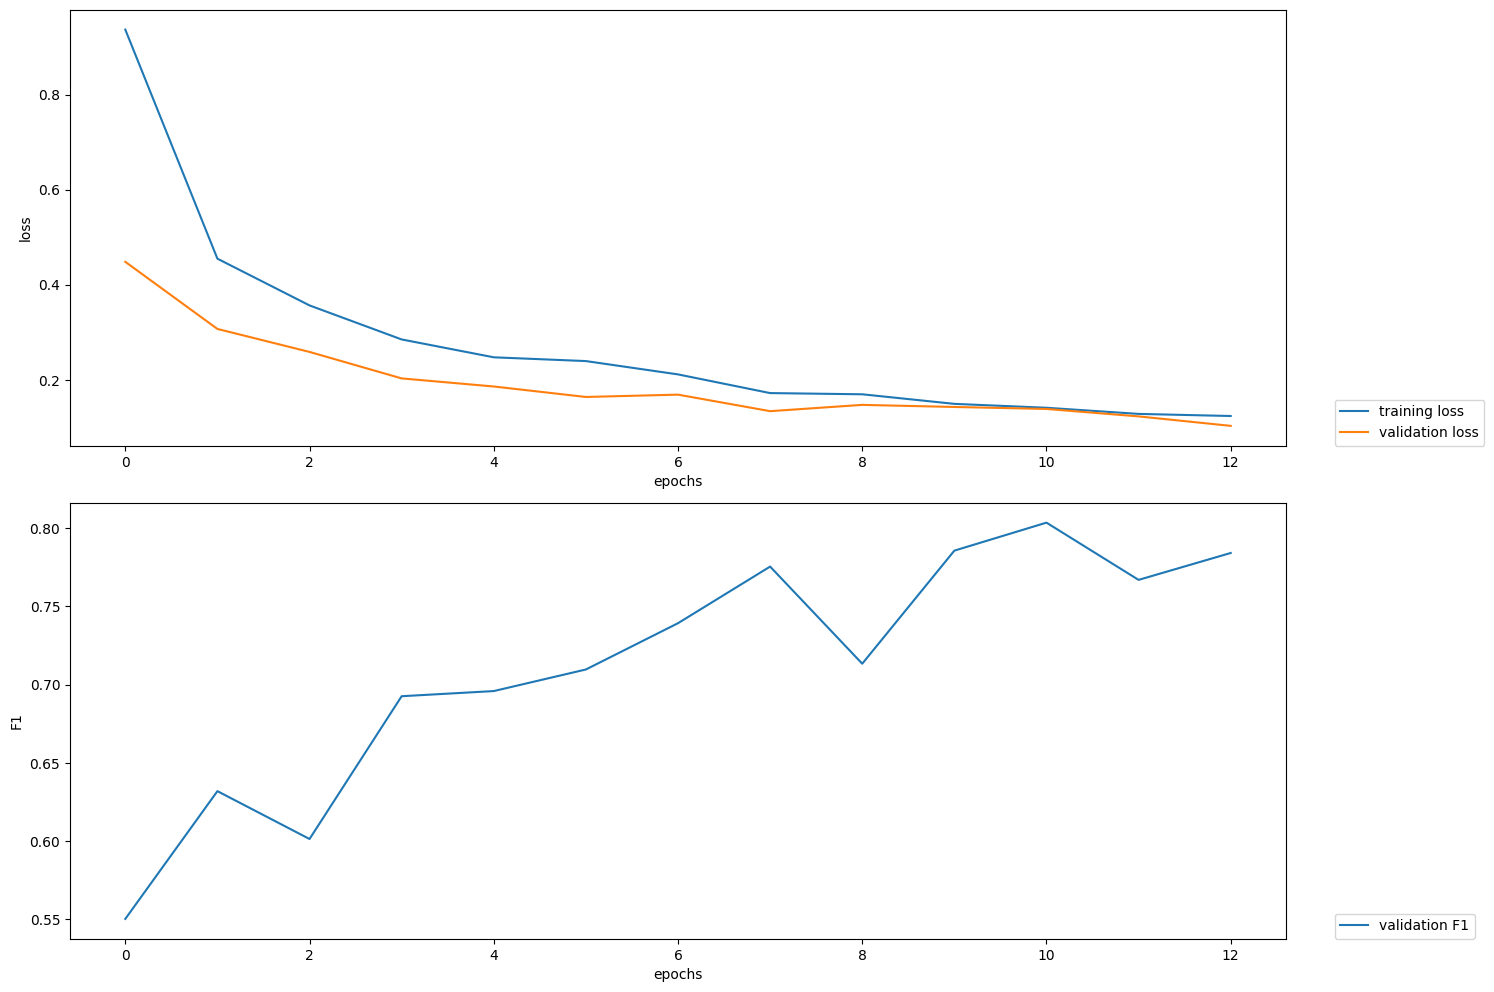

2024-01-23 11:28:00,025 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-ECHR-train-ES/Flair-Hug-model-ES-rev/weights.png


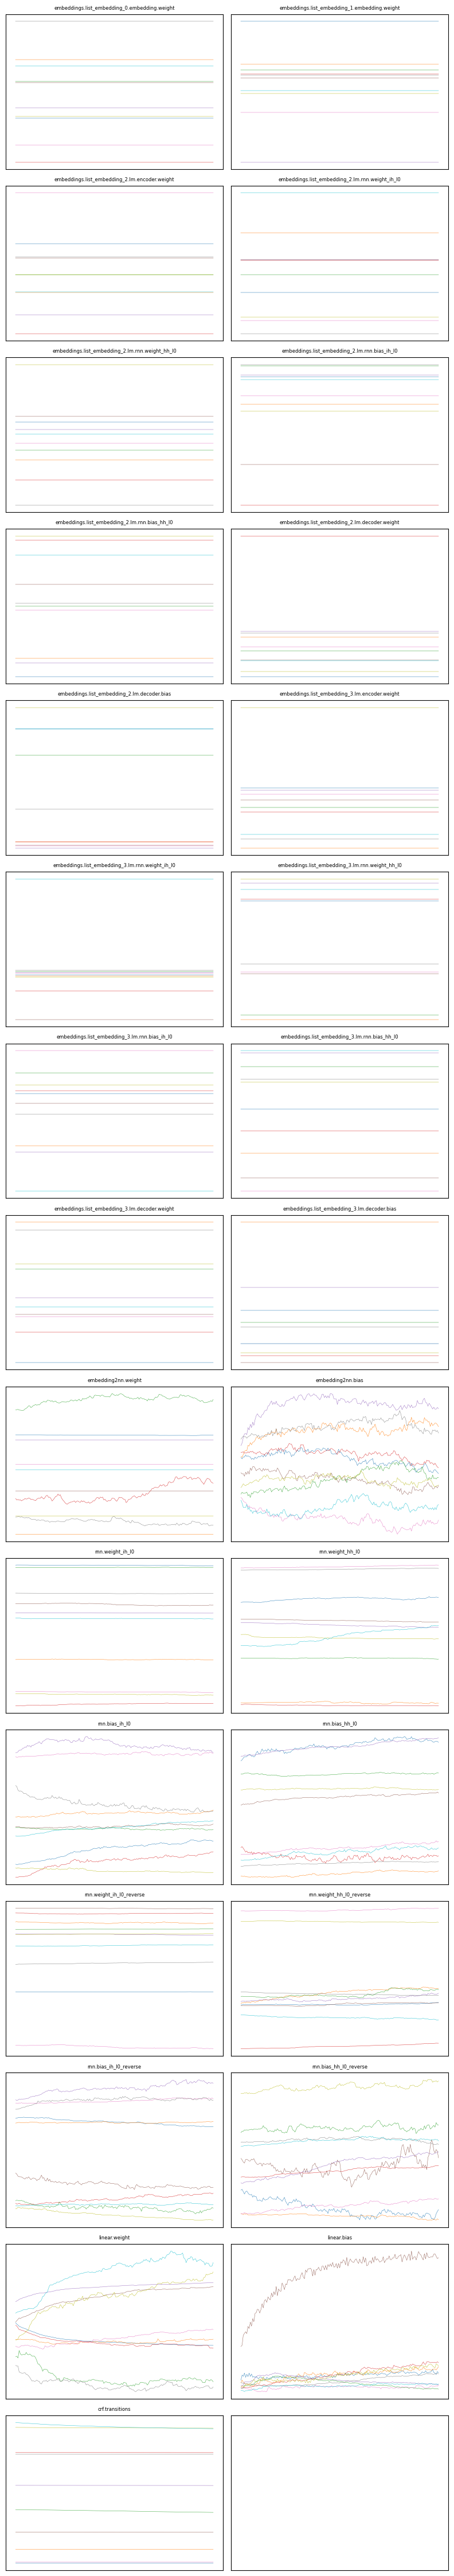

In [12]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')